In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
#import libraries
import torch
import torchvision
import torchvision.transforms as transforms

In [30]:
#transform PIL images to tensors and normalize to range of [-1,1]
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [31]:
#downloading data and data loader
batch_size=4
trainset=torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
trainloader=torch.utils.data.DataLoader(dataset=trainset,batch_size=batch_size,shuffle=True, num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(dataset=testset,batch_size=batch_size,shuffle=False,num_workers=2)

classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [32]:
print(len(trainset))
print(len(testset))

50000
10000


horse


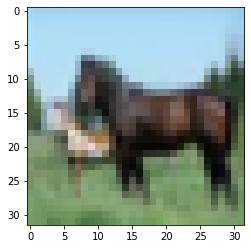

In [33]:
#see sample images from trainset
import matplotlib.pyplot as plt

image, label=trainset[12]
print(classes[label])
image=image*0.5+0.5
plt.imshow(image.permute(1,2,0))

In [34]:
#define a CNN
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel,self).__init__()
        
        self.cnn1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1)
        self.relu1=nn.ReLU()
        self.cnn2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.relu2=nn.ReLU()
        self.maxpool1=nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.cnn3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
        self.relu3=nn.ReLU()
        self.cnn4=nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1)
        self.relu4=nn.ReLU()
        self.maxpool2=nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.cnn5=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
        self.relu5=nn.ReLU()
        self.cnn6=nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1)
        self.relu6=nn.ReLU()
        self.maxpool3=nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.fc1=nn.Linear(256*4*4,1024)
        self.relu7=nn.ReLU()
        
        self.fc2=nn.Linear(1024,512)
        self.relu8=nn.ReLU()
        
        self.fc3=nn.Linear(512,10)
    
    def forward(self,x):
        x=self.cnn1(x)
        x=self.relu1(x)
        x=self.cnn2(x)
        x=self.relu2(x)
        x=self.maxpool1(x)
        
        x=self.cnn3(x)
        x=self.relu3(x)
        x=self.cnn4(x)
        x=self.relu4(x)
        x=self.maxpool2(x)
        
        x=self.cnn5(x)
        x=self.relu5(x)
        x=self.cnn6(x)
        x=self.relu6(x)
        x=self.maxpool3(x)
        
        x=torch.flatten(x,1)
        
        x=self.fc1(x)
        x=self.relu7(x)
        x=self.fc2(x)
        x=self.relu8(x)
        x=self.fc3(x)
        return x
        

In [35]:
#Here we using cross entropy loss as our loss function and SGD as optimizer
import torch.optim as optim
import torch.nn as nn
cnn=CNNModel()
lossfunc=nn.CrossEntropyLoss()
optimizer=optim.SGD(cnn.parameters(),lr=0.001,momentum=0.9)

In [36]:
# training the cnn model
from torch.autograd import Variable
for epoch in range(9):
    for i, data in enumerate(trainloader,0):
        images,labels=data
        optimizer.zero_grad()
        outputs=cnn(images)
        
        loss=lossfunc(outputs,labels)
        loss.backward()
        optimizer.step()
        
        if i%2000==1999:
            print('Iteration:{},Loss:{}'.format(i+1,loss.data))

Iteration:2000,Loss:2.310002326965332
Iteration:4000,Loss:2.308927536010742
Iteration:6000,Loss:2.309206962585449
Iteration:8000,Loss:2.208792209625244
Iteration:10000,Loss:2.0273334980010986
Iteration:12000,Loss:2.1504595279693604
Iteration:2000,Loss:1.4608074426651
Iteration:4000,Loss:1.2963926792144775
Iteration:6000,Loss:0.852439284324646
Iteration:8000,Loss:1.1308128833770752
Iteration:10000,Loss:0.8696424961090088
Iteration:12000,Loss:1.579115867614746
Iteration:2000,Loss:1.7340701818466187
Iteration:4000,Loss:0.8217468857765198
Iteration:6000,Loss:0.7424120306968689
Iteration:8000,Loss:0.8727331757545471
Iteration:10000,Loss:0.6203713417053223
Iteration:12000,Loss:0.3369641900062561
Iteration:2000,Loss:0.46060317754745483
Iteration:4000,Loss:0.12469468265771866
Iteration:6000,Loss:1.4131916761398315
Iteration:8000,Loss:0.3058359920978546
Iteration:10000,Loss:0.8568336963653564
Iteration:12000,Loss:0.8494890332221985
Iteration:2000,Loss:0.06984679400920868
Iteration:4000,Loss:0.2

In [37]:
total=0
correct=0
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=cnn(images)
        _,predicted=torch.max(outputs.data,1)
        correct+=(labels==predicted).sum()
        total+=len(labels)
    accuracy=correct*100/total
    print('Accuracy:{}'.format(accuracy))

Accuracy:78.26000213623047
